# Business Problem Understanding

## Context

Customer churn is a problem that any business with a recurring revenue will face at any point. The main target for businesses is to have the lowest amount of churn rate as possible, since customer retention costs far less than customer acquisition. 

Customer churn in the sense of a e-commerce business is when customers stop buying from the online store, the churn rate itself is the percentage of the customers that stop buying from the e-commerce over a period that is predetermined.

There are two types of customer churn:
1. Voluntary Churn, where customer actively decides to stop buying from the online store
2. Involuntary Churn, where a technical issue or payment issue stoping the customers' purchase to fail.

## Problem Statement

The loss of customers from the online store can be costly for the company, since the costs of acquiring new customers are higher than the cost of retenting customer. Thus, the company wants to know which customers will churn so that, they can offer some promotions on the customers that are in danger of churning.

## Goals

From the problem statement, the e-commerce company wanted to predict which customers will churn, thus, by knowing which customers that will churn, the company can put an emphasize on retenting said customers by way such as, giving discount vouchers or special sale, so that, customers that will probably churn, will keep on purchasing from the online store.

Thus, the company can save more money by focusing more on customer retention rather than customer acquisition.

Also, we can try to find the factors for the customer that churns, so that the company can make an effort to plan around said factors for the customer churn

## Analytic Approach

First, we will do some exploratory data analysis to find some pattern in the customer churn.

Next, we will also build a classification model for the e-commerce company to predict which customers will churn so that, we can focus on the retention of the customers that will churn by offering some promotions.

## Metric Evaluation

For the metric evaluation, in the selection of the model that is going to be used for the company, ROC-AUC score will be used since with ROC-AUC score, we can see how well the model can separate the target classes whether the customer will churn or not. Also f1-score will be another metric to be assessed rather than accuracy, since the data is imbalanced.

In this data, we are trying to correctly predict the customers that churns, so that the company can approach said customers with promotions to prevent the customers to stop buying from the online store. Thus, it is better for the model to incorrectly predict that the customer will churn, rather than incorrectly predicting that the customer will not churn but in actuality, the customer will churn, thus, it is better to focus on the recall value during the model training.

# Library Import

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import missingno as mno

from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [3]:
plt.close()
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

# Data Loading

In [4]:
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

This dataset contains 5630 observations or rows and 20 columns or features

## Attribute Information

|Feature|Data Type|Description|
| --- | --- | --- |
| CustomerID | int64 | Unique customer ID |
| Churn| int64 | Churn Flag with 0 being not churning and 1 churning|
| Tenure | float64 | Tenure of customer in organization |
| PreferredLoginDevice | Object | Preferred login device of customer |
| CityTier | int64 | City tier of the customer |
| WarehouseToHome | float64 | Distance in between warehouse to home of customer |
| PreferredPaymentMode | Object | Preferred payment method of customer |
| Gender | Object | Gender of customer |
| HourSpendOnApp | float64 | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered | int64 | Total number of deceives is registered on particular customer |
| PreferedOrderCat | Object | Preferred order category of customer in last month |
| SatisfactionScore | int64 | Satisfactory score of customer on service |
| MaritalStatus | object | Marital status of customer |
| NumberOfAddress | int64 | Total number of added added on particular customer |
| Complain | int64 | Total number of complaints raised by the customer in last month |
| OrderAmountHikeFromlastYear | float64 | Percentage increases in order from last year |
| CouponUsed | float64 | Total number of coupon has been used in last month |
| OrderCount | float64 | Total number of orders has been places in last month |
| DaySinceLastOrder | float64 | Day Since last order by customer |
| CashbackAmount | float64 | Average cashback in last month |


The dataset contains the information of each of the customers that subscribes to the e-commerce company.

In [6]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].nunique(), df[col].unique()])

df_desc = pd.DataFrame(columns = ['Feature', 'Data Type', 'Number of Unique', 'Unique'], data = listItem)
df_desc

,Feature,Data Type,Number of Unique,Unique
0,CustomerID,int64,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,int64,2,"[1, 0]"
2,Tenure,float64,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,object,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,int64,3,"[3, 1, 2]"
5,WarehouseToHome,float64,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,object,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
7,Gender,object,2,"[Female, Male]"
8,HourSpendOnApp,float64,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,6,"[3, 4, 5, 2, 1, 6]"


As can be seen from the dataframe above, most of the data are numerical with several categorical data, as can be seen most of the categorical data had a low cardinality. Several of the numerical data however are categorical data in the form of number, such as, the satisfaction score and city tier.

The target variable, churn, is already in the form of numerical variable, thus no further processing will be needed during the modelling stage.

Next, we will check if any of the data is a duplicate data

In [7]:
df.duplicated().sum()

0

It can be seen from the duplicated function above there is no duplicated values contained in the dataset, we can also see from the amount of unique values contained in the Customer ID column is equal to the number of rows, so we can conclude that the dataset contain no duplicated value

Next, we can drop the Customer ID column since it will not be used anymore beyond the duplicate data check since, it does not contribute much to the data analysis and model creation

In [8]:
df.drop('CustomerID', axis = 1, inplace = True)

## Missing Value

Next, we will try to check for any missing value for any of the column

In [9]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), df[col].isna().sum()/len(df)*100, df[col].nunique(), df[col].unique()])

df_desc = pd.DataFrame(columns = ['Feature', 'Data Type', 'Null Values', 'Null Values Percentage', 'Number of Unique', 'Unique'], data = listItem)
df_desc

,Feature,Data Type,Null Values,Null Values Percentage,Number of Unique,Unique
0,Churn,int64,0,0.000000,2,"[1, 0]"
1,Tenure,float64,264,4.689165,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
2,PreferredLoginDevice,object,0,0.000000,3,"[Mobile Phone, Phone, Computer]"
3,CityTier,int64,0,0.000000,3,"[3, 1, 2]"
4,WarehouseToHome,float64,251,4.458259,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
5,PreferredPaymentMode,object,0,0.000000,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
6,Gender,object,0,0.000000,2,"[Female, Male]"
7,HourSpendOnApp,float64,255,4.529307,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
8,NumberOfDeviceRegistered,int64,0,0.000000,6,"[3, 4, 5, 2, 1, 6]"
9,PreferedOrderCat,object,0,0.000000,6,"[Laptop & Accessory, Mobile, Mobile Phone, Oth..."


In [58]:
print('Total Null Values', df.isna().values.ravel().sum())
print('Total Null Values Percentage', df.isna().values.ravel().sum()/len(df)*100)

Total Null Values 1856
Total Null Values Percentage 32.96625222024866


Since the total null values percentage is approximately 32%, we will not drop the null values, next, we will check the null values statistics using the MissingNo library

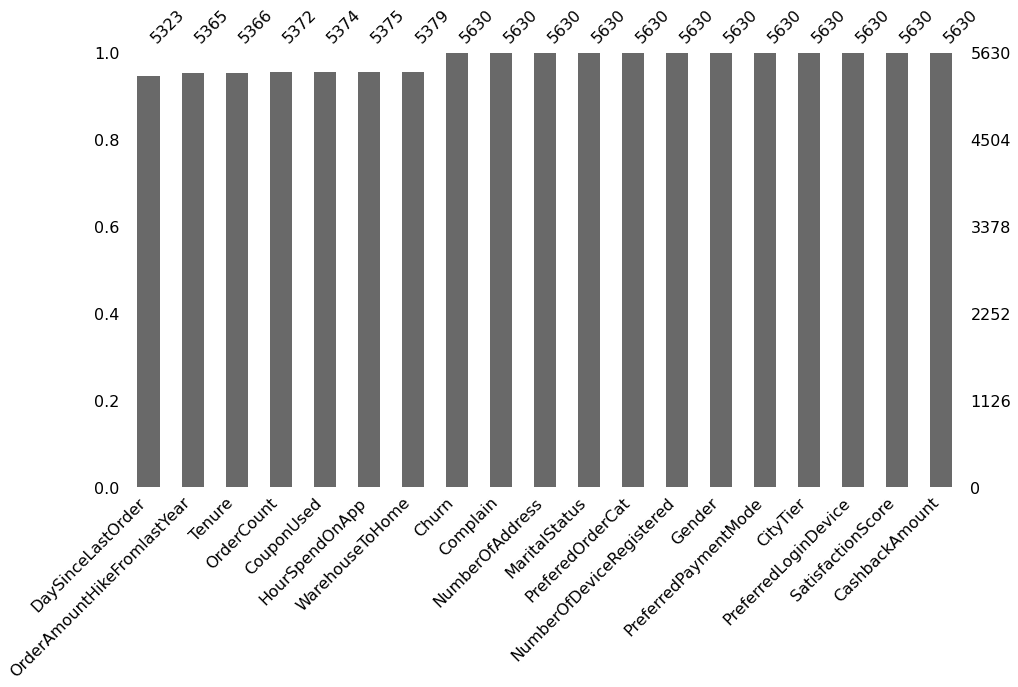

In [10]:
mno.bar(df, sort = 'ascending', figsize = (15, 8))

From both the dataframe and the bar plot above, we can see that DaySinceLastOrder, OrderAmountHikeFromLastYear, Tenure, OrderCount, CouponUsed, HourSpendOnApp, WarehouseToHome are the columns that contains the missing value

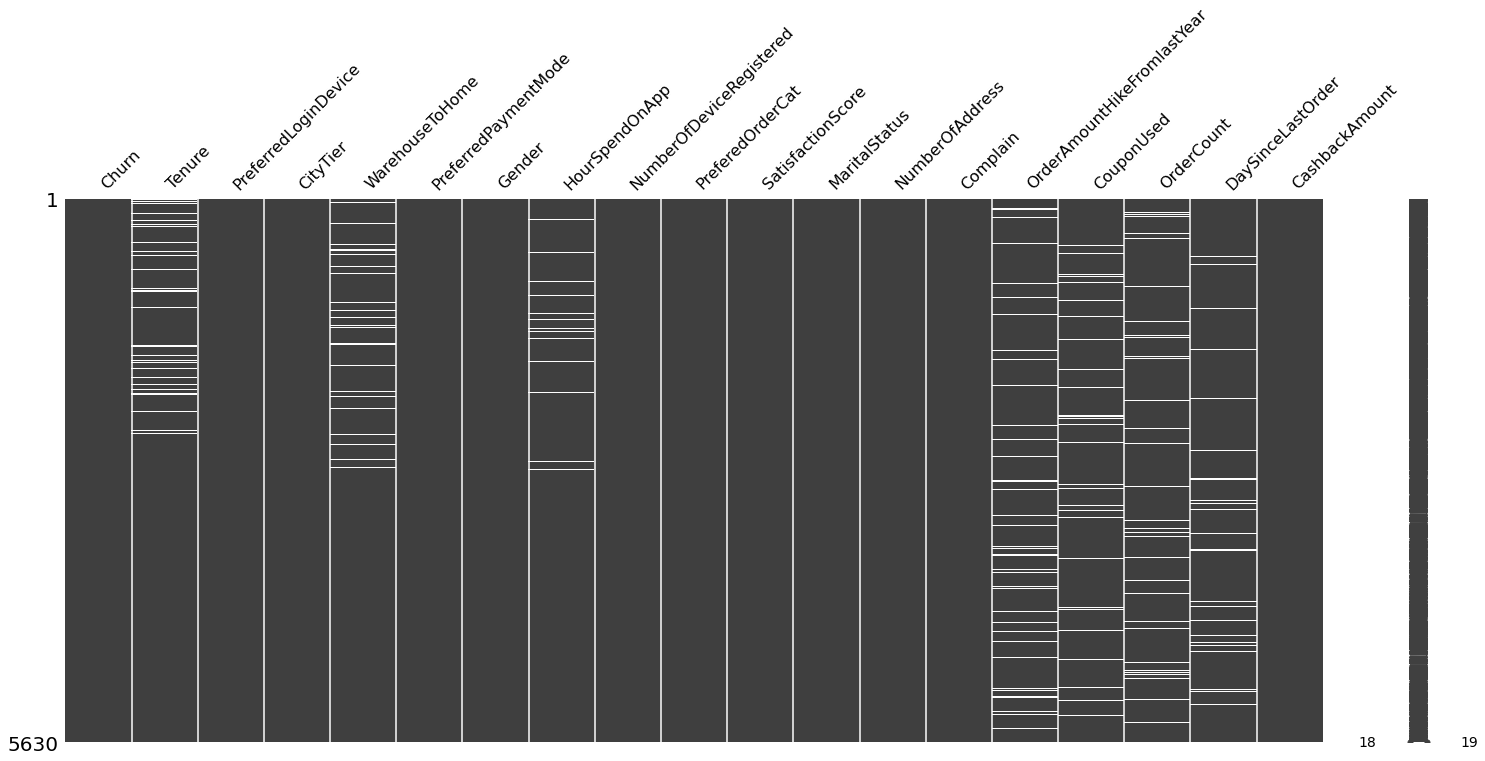

In [11]:
mno.matrix(df)

From above heatmap, it can be seen that the missing values are located quite randomly with little pattern, one pattern perhaps can be seen that in the tenure, warehousetohome and hourspendsonapp column only had missing values on the top half of the dataset while the rest, have missing values all over the dataset.

Next, we will check if the missing value had any correlation between the missing values

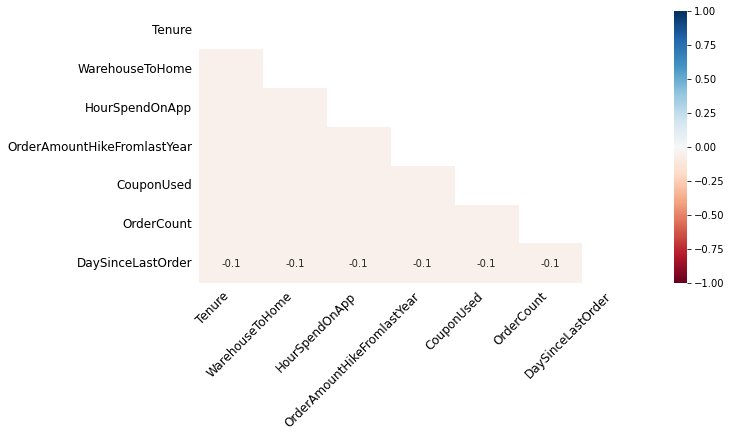

In [12]:
mno.heatmap(df, figsize = (10, 5), fontsize = 12);

It can be seen from the heatmap above, that the data that has missing value are not correlated with each other

## Missing Values DaySinceLastOrder

In [13]:
df[df['DaySinceLastOrder'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
88,0,24.0,Mobile Phone,1,14.0,Debit Card,Male,2.0,4,Fashion,4,Divorced,6,0,16.0,1.0,4.0,NaN,224.90
97,0,10.0,Computer,1,17.0,UPI,Male,2.0,3,Fashion,2,Married,2,1,14.0,0.0,1.0,NaN,221.85
126,0,12.0,Computer,1,8.0,Cash on Delivery,Female,3.0,3,Fashion,3,Single,1,0,25.0,10.0,11.0,NaN,209.38
146,1,10.0,Computer,1,35.0,Debit Card,Male,2.0,3,Fashion,4,Divorced,2,1,12.0,5.0,9.0,NaN,218.49
151,0,2.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,2,Fashion,4,Married,8,0,18.0,5.0,6.0,NaN,219.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,0,6.0,Mobile Phone,3,8.0,E wallet,Female,3.0,4,Fashion,1,Married,3,0,20.0,1.0,6.0,NaN,229.22
5608,0,15.0,Mobile Phone,3,10.0,Debit Card,Male,3.0,5,Laptop & Accessory,4,Married,4,0,12.0,2.0,2.0,NaN,214.38
5610,0,9.0,Mobile Phone,2,33.0,Debit Card,Female,3.0,4,Fashion,1,Single,3,1,17.0,2.0,2.0,NaN,213.37
5623,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224.36


In [14]:
df[df['DaySinceLastOrder'].isna()]['Churn'].value_counts(normalize = True)

0    0.824104
1    0.175896
Name: Churn, dtype: float64

## Missing Value Order Hike from Last Year

In [15]:
df[df['OrderAmountHikeFromlastYear'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,NaN,9.0,15.0,8.0,295.45
40,0,23.0,Mobile Phone,1,17.0,Debit Card,Female,2.0,3,Others,4,Single,4,0,NaN,2.0,4.0,4.0,299.26
65,0,25.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Others,3,Divorced,1,0,NaN,1.0,11.0,9.0,299.99
106,0,15.0,Mobile Phone,1,10.0,Cash on Delivery,Male,2.0,3,Others,2,Divorced,2,0,NaN,0.0,11.0,15.0,292.32
108,0,23.0,Mobile Phone,3,6.0,Credit Card,Female,3.0,3,Others,2,Married,4,0,NaN,1.0,1.0,6.0,295.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
5537,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,NaN,5.0,5.0,4.0,316.61
5561,0,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,NaN,2.0,2.0,5.0,321.36
5597,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,NaN,2.0,2.0,4.0,319.31


## Missing Value Warehouse to Home

In [16]:
df[df['WarehouseToHome'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
28,0,18.0,Phone,1,NaN,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,123.48
35,0,0.0,Phone,1,NaN,CC,Male,3.0,3,Mobile,2,Divorced,2,0,24.0,0.0,2.0,2.0,123.23
39,0,0.0,Computer,1,NaN,CC,Male,3.0,4,Mobile,3,Married,2,1,15.0,0.0,1.0,1.0,125.66
41,0,14.0,Phone,1,NaN,Debit Card,Male,2.0,3,Mobile,3,Married,5,0,12.0,1.0,1.0,8.0,124.51
46,1,0.0,Computer,3,NaN,COD,Female,3.0,5,Mobile,5,Single,1,0,21.0,1.0,1.0,0.0,123.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,0,17.0,Phone,1,NaN,CC,Male,2.0,3,Mobile,1,Single,7,1,12.0,1.0,1.0,2.0,124.36
2781,0,0.0,Phone,3,NaN,CC,Male,2.0,3,Mobile,5,Single,2,1,11.0,1.0,1.0,2.0,123.80
2789,1,19.0,Phone,1,NaN,COD,Male,3.0,3,Mobile,3,Married,9,0,11.0,6.0,9.0,8.0,123.39
2794,0,5.0,Phone,1,NaN,COD,Male,3.0,3,Mobile,5,Single,2,0,14.0,0.0,1.0,2.0,124.39


## Missing Value Hour Spend on App

In [17]:
df[df['HourSpendOnApp'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
8,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
16,1,0.0,Computer,1,12.0,Debit Card,Female,NaN,4,Mobile,2,Single,2,1,18.0,1.0,1.0,0.0,129.26
37,0,1.0,Phone,1,27.0,CC,Male,NaN,3,Mobile,2,Divorced,2,0,11.0,0.0,1.0,2.0,127.13
44,0,5.0,Phone,1,12.0,Debit Card,Male,NaN,3,Mobile,3,Single,4,0,20.0,0.0,1.0,4.0,130.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,0,14.0,Phone,1,7.0,Debit Card,Male,NaN,3,Mobile,1,Married,4,0,22.0,0.0,1.0,0.0,127.82
2771,0,5.0,Phone,1,35.0,Debit Card,Female,NaN,4,Mobile,4,Single,2,0,13.0,0.0,4.0,1.0,128.37
2800,0,13.0,Phone,1,8.0,Debit Card,Male,NaN,4,Mobile,3,Single,3,0,14.0,0.0,2.0,2.0,128.09
2803,0,8.0,Phone,1,7.0,Debit Card,Female,NaN,5,Mobile,1,Married,2,0,12.0,1.0,1.0,1.0,129.77


## Missing Value Tenure

In [18]:
df[df['Tenure'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
6,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
9,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,0,NaN,Phone,2,8.0,UPI,Female,2.0,3,Mobile,4,Married,5,0,14.0,0.0,1.0,2.0,121.87
2760,0,NaN,Computer,1,7.0,CC,Male,2.0,4,Mobile,3,Married,2,0,12.0,0.0,1.0,0.0,120.08
2773,0,NaN,Phone,3,7.0,CC,Male,3.0,4,Mobile,4,Married,1,0,14.0,2.0,2.0,2.0,122.69
2783,1,NaN,Computer,3,15.0,E wallet,Male,2.0,3,Mobile Phone,5,Married,2,0,19.0,1.0,1.0,0.0,117.90


## Missing Value Coupon Used

In [19]:
df[df['CouponUsed'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
61,0,13.0,Mobile Phone,1,10.0,Credit Card,Female,2.0,3,Others,3,Divorced,2,0,14.0,NaN,9.0,9.0,290.33
62,0,28.0,Mobile Phone,1,20.0,Credit Card,Male,3.0,2,Others,4,Single,9,0,11.0,NaN,2.0,15.0,287.22
69,0,18.0,Computer,1,8.0,Credit Card,Male,3.0,4,Grocery,2,Divorced,10,0,23.0,NaN,11.0,8.0,267.92
112,0,25.0,Computer,3,8.0,Debit Card,Male,3.0,4,Others,3,Single,2,1,18.0,NaN,15.0,12.0,290.68
138,0,19.0,Mobile Phone,3,8.0,Cash on Delivery,Female,3.0,5,Grocery,4,Divorced,4,1,12.0,NaN,7.0,7.0,268.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,0,21.0,Mobile Phone,3,9.0,Debit Card,Female,3.0,2,Grocery,4,Married,8,0,15.0,NaN,2.0,3.0,284.72
5355,0,23.0,Mobile Phone,1,8.0,Debit Card,Male,3.0,4,Grocery,3,Single,6,0,15.0,NaN,2.0,1.0,278.79
5461,0,31.0,Computer,3,9.0,Credit Card,Male,3.0,4,Grocery,4,Married,6,0,23.0,NaN,15.0,15.0,287.91
5470,0,31.0,Computer,1,22.0,Debit Card,Male,3.0,4,Grocery,3,Married,4,1,15.0,NaN,3.0,3.0,282.87


## Missing Value Order Count

In [20]:
df[df['CouponUsed'].isna()]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
61,0,13.0,Mobile Phone,1,10.0,Credit Card,Female,2.0,3,Others,3,Divorced,2,0,14.0,NaN,9.0,9.0,290.33
62,0,28.0,Mobile Phone,1,20.0,Credit Card,Male,3.0,2,Others,4,Single,9,0,11.0,NaN,2.0,15.0,287.22
69,0,18.0,Computer,1,8.0,Credit Card,Male,3.0,4,Grocery,2,Divorced,10,0,23.0,NaN,11.0,8.0,267.92
112,0,25.0,Computer,3,8.0,Debit Card,Male,3.0,4,Others,3,Single,2,1,18.0,NaN,15.0,12.0,290.68
138,0,19.0,Mobile Phone,3,8.0,Cash on Delivery,Female,3.0,5,Grocery,4,Divorced,4,1,12.0,NaN,7.0,7.0,268.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,0,21.0,Mobile Phone,3,9.0,Debit Card,Female,3.0,2,Grocery,4,Married,8,0,15.0,NaN,2.0,3.0,284.72
5355,0,23.0,Mobile Phone,1,8.0,Debit Card,Male,3.0,4,Grocery,3,Single,6,0,15.0,NaN,2.0,1.0,278.79
5461,0,31.0,Computer,3,9.0,Credit Card,Male,3.0,4,Grocery,4,Married,6,0,23.0,NaN,15.0,15.0,287.91
5470,0,31.0,Computer,1,22.0,Debit Card,Male,3.0,4,Grocery,3,Married,4,1,15.0,NaN,3.0,3.0,282.87


From all of the above dataframes that for each of the rows that contains missing value, there seems to be no discernable relations between the other columns with the missing value. Thus, in the modelling step, we will use an imputer with median strategy, as can be seen that all of the columns that contains missing value are all numerical features.

# Exploratory Data Analysis

In [21]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

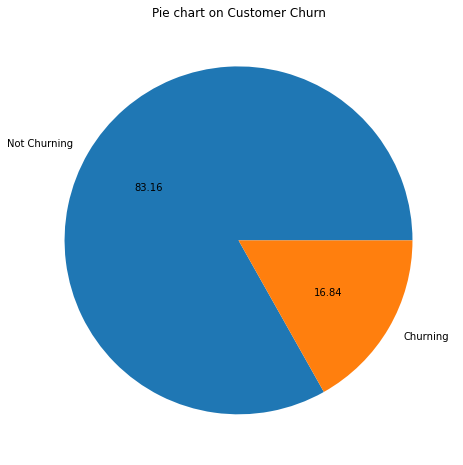

In [22]:
plt.figure(figsize = (8, 8))
plt.pie(df['Churn'].value_counts(), autopct = '%.2f', labels = ['Not Churning', 'Churning'])
plt.title('Pie chart on Customer Churn', color = 'black')
plt.show()

It can be seen from the pie chart above that the data is imbalanced with the data containing more observations on customers not churning, which is 83.16% of the whole as opposed to churning customers which is 16.84%

In [23]:
df[df['Churn'] == 0].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,4682.0,4499.000000,4682.000000,4515.000000,4485.000000,4682.000000,4682.000000,4682.000000,4682.000000,4431.000000,4434.000000,4442.000000,4429.000000,4682.000000
mean,0.0,11.502334,1.619821,15.353931,2.925530,3.639257,3.001282,4.162965,0.234088,15.724893,1.758232,3.046601,4.807406,180.635203
std,0.0,8.419217,0.902332,8.483276,0.727184,1.018910,1.378722,2.537001,0.423473,3.646256,1.893083,2.964982,3.644758,50.434791
min,0.0,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.0,5.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,147.240000
50%,0.0,10.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,4.000000,166.115000
75%,0.0,17.000000,3.000000,19.000000,3.000000,4.000000,4.000000,5.000000,0.000000,18.000000,2.000000,3.000000,8.000000,201.250000
max,0.0,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,31.000000,324.990000


In [24]:
df[df['Churn'] == 1].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,948.0,867.000000,948.000000,864.000000,890.000000,948.000000,948.000000,948.000000,948.000000,934.000000,940.000000,930.000000,894.000000,948.000000
mean,1.0,3.379469,1.827004,17.134259,2.961798,3.934599,3.390295,4.466245,0.535865,15.627409,1.717021,2.823656,3.236018,160.370928
std,0.0,5.486089,0.959380,8.631132,0.694427,1.014127,1.342031,2.790071,0.498975,3.812084,1.902503,2.809924,3.415137,38.436055
min,1.0,0.000000,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,110.090000
25%,1.0,0.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,13.000000,1.000000,1.000000,1.000000,132.020000
50%,1.0,1.000000,1.000000,15.000000,3.000000,4.000000,3.000000,3.000000,1.000000,14.000000,1.000000,2.000000,2.000000,149.660000
75%,1.0,3.000000,3.000000,24.000000,3.000000,5.000000,5.000000,6.000000,1.000000,18.000000,2.000000,3.000000,5.000000,174.690000
max,1.0,21.000000,3.000000,36.000000,4.000000,6.000000,5.000000,20.000000,1.000000,26.000000,16.000000,16.000000,46.000000,323.590000


From above dataframe, it can be seen that even in the customers that churns, the daysincelastorder column has a minimum value of 0, since the column has a minimum value of 0, it seems that customers is counted as churning eventhough they have already ordered really recently, with a median value of 5 and mean of around 3, it seems that the company did not count churn as the customer stop ordering from the online store

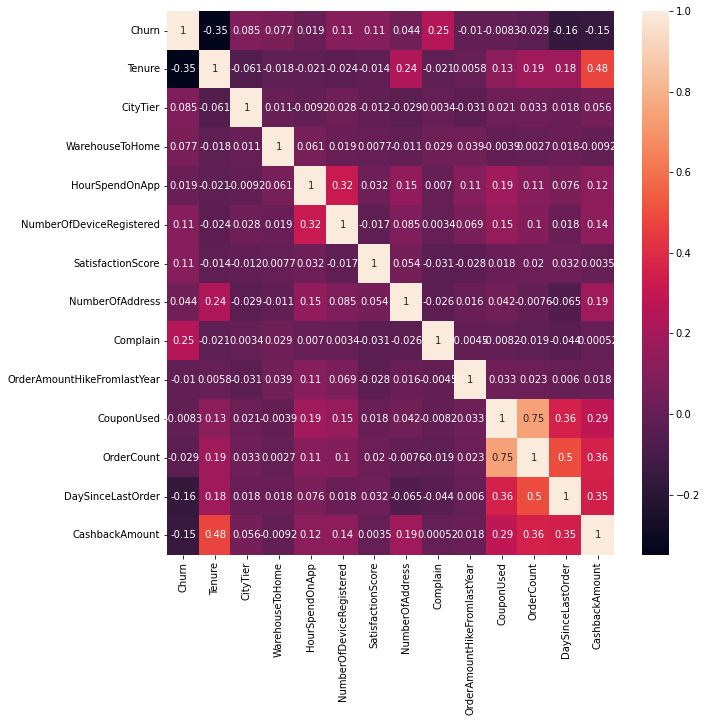

In [25]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Based on the heatmap above, there are several numerical datas that has strong correlation with each other with the highest being the correlation between coupon used and order count, which we can explore more in the data analysis section

## Based on Tenure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


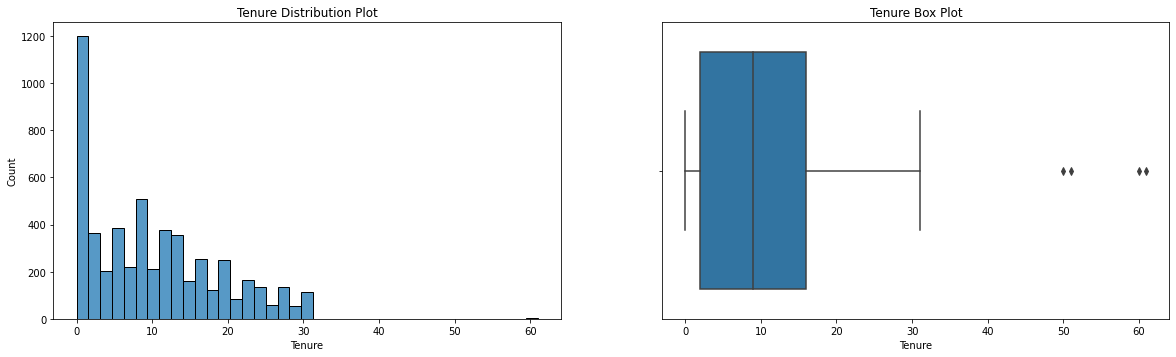

In [26]:
plt.figure(figsize = (20, 12))

plt.subplot(221)
sns.histplot(df['Tenure'])
plt.title('Tenure Distribution Plot')

plt.subplot(222)
sns.boxplot(df['Tenure'])
plt.title('Tenure Box Plot')

plt.show()

As seen in the above plot, the distribution seemms to be highly right skewed, and there are several outliers within the range of 50-60s.

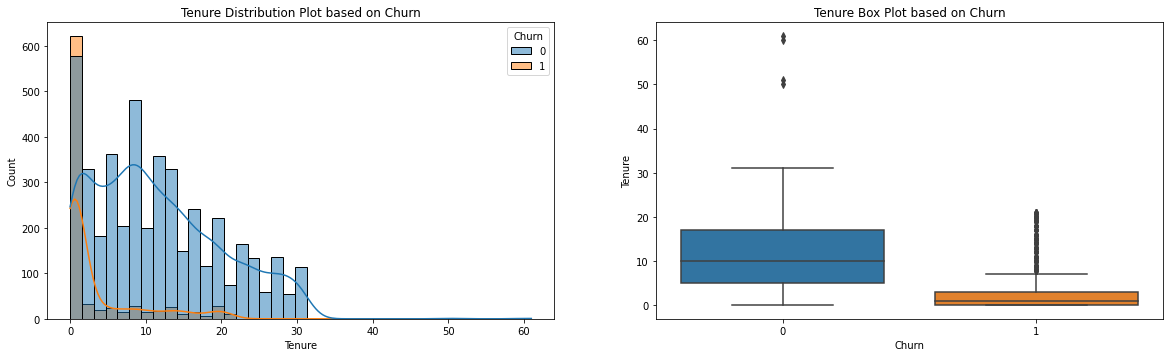

In [27]:
plt.figure(figsize = (20, 12))

plt.subplot(221)
sns.histplot(data = df, x = 'Tenure', hue = 'Churn', kde = True)
plt.title('Tenure Distribution Plot based on Churn')

plt.subplot(222)
sns.boxplot(data = df, y = 'Tenure', x = 'Churn')
plt.title('Tenure Box Plot based on Churn')

plt.show()

The higher the tenure length, the less likely it is for the customer to churn, as can be seen, at near 0 the amount of people that churns is higher than the people that did not churn, eventhough, the proportion of people not churning is higher.

Also, from the boxplot above, we can seee that the tenure had a much higher lower and higher fence on the not churning with a few outliers, however, for the people that churns, it had less lower and upper fence with quite large amount of outliers, thus it can be inferred that people with longer tenure will tend to not churn with a few outlier that do.

## Based on WarehouseToHome

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


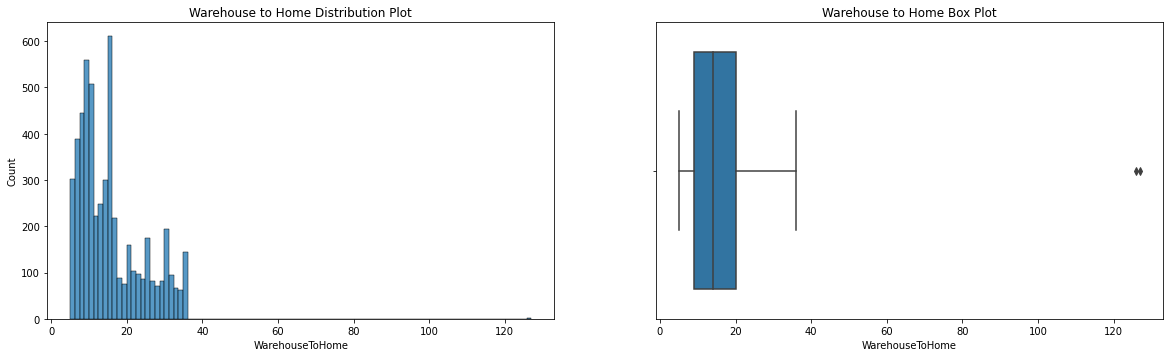

In [28]:
plt.figure(figsize = (20, 12))

plt.subplot(221)
sns.histplot(df['WarehouseToHome'])
plt.title('Warehouse to Home Distribution Plot')

plt.subplot(222)
sns.boxplot(df['WarehouseToHome'])
plt.title('Warehouse to Home Box Plot')

plt.show()

As can be seen from the plots above, the data seems to be highly right skewed, with little outlier at above 120.

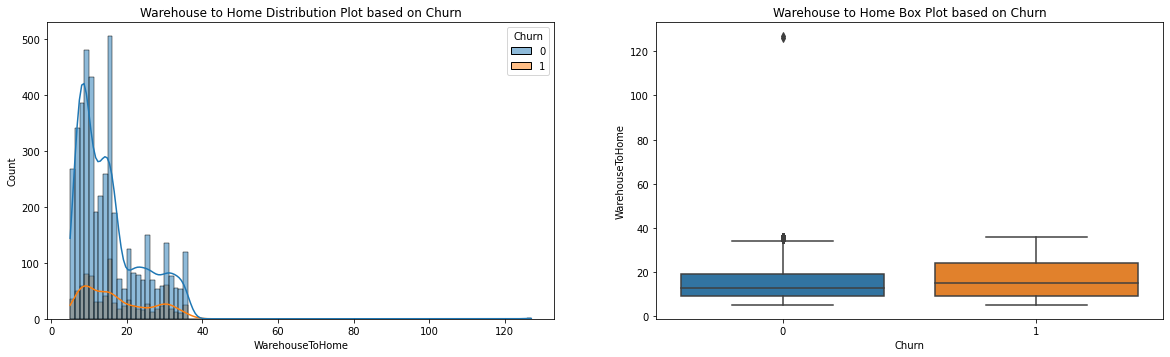

In [29]:
plt.figure(figsize = (20, 12))

plt.subplot(221)
sns.histplot(data = df, x = 'WarehouseToHome', hue = 'Churn', kde = True)
plt.title('Warehouse to Home Distribution Plot based on Churn')

plt.subplot(222)
sns.boxplot(data = df, y = 'WarehouseToHome', x = 'Churn')
plt.title('Warehouse to Home Box Plot based on Churn')

plt.show()

Based on the plot above, most of the customers live within 40 miles from the warehouse, with the an outlier of above 120 miles.

According to the box plot, interestingly, only customer that did not churn at all have outliers. However the interquartile range of the customer that did not churn is quite smaller eventhough it have more or less the same higher and lower fence. Customers that did not churn also had a lower distance median compared to the customer that did churn.

## Based on Customer Satisfaction Score

<function matplotlib.pyplot.show(*args, **kw)>

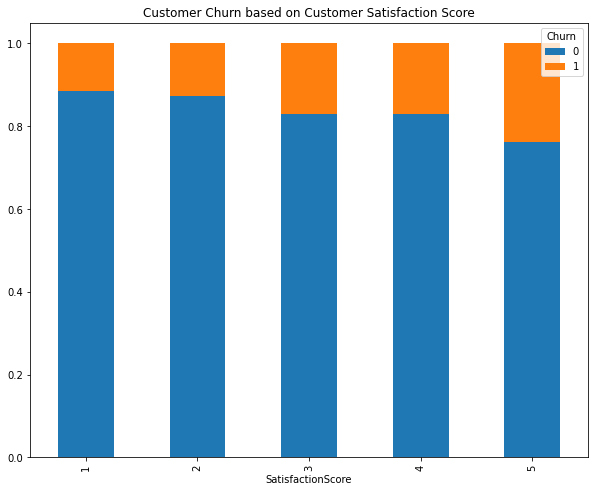

In [30]:
fig = plt.figure(figsize = (10, 8))
ax = plt.subplot(1, 1, 1)
sat_ct = pd.crosstab(df['SatisfactionScore'], df['Churn'],normalize=0)
sat_ct.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('Customer Churn based on Customer Satisfaction Score')
plt.show

From above barplot, there are no clear pattern on the satisfaction score's impact on the customer churn as can be seen that, there are higher percentage of customer churn in where customer satisfaction score is 5. However in both, the churn and not churning, the highest count could be seen in the satisfaction score of 3. Thus, there are no pattern could be taken from this bar plot.

## Based on Order Count, Coupon Used and Days Since Last Order

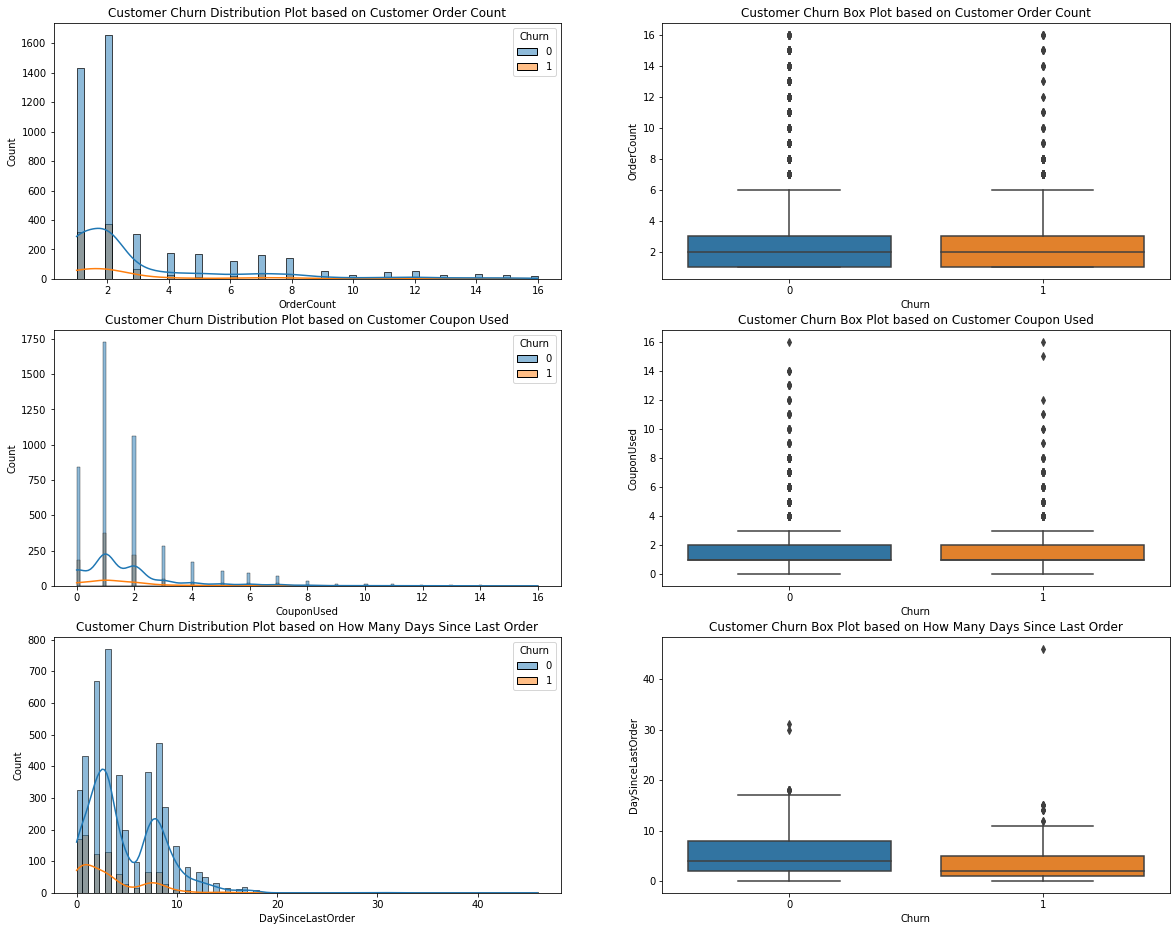

In [31]:
plt.figure(figsize = (20, 16)).tight_layout()

plt.subplot(321)
sns.histplot(data = df, x = 'OrderCount', hue = 'Churn', kde = True)
plt.title('Customer Churn Distribution Plot based on Customer Order Count')

plt.subplot(322)
sns.boxplot(data = df, y = 'OrderCount', x = 'Churn')
plt.title('Customer Churn Box Plot based on Customer Order Count')

plt.subplot(323)
sns.histplot(data = df, x = 'CouponUsed', hue = 'Churn', kde = True)
plt.title('Customer Churn Distribution Plot based on Customer Coupon Used')

plt.subplot(324)
sns.boxplot(data = df, y = 'CouponUsed', x = 'Churn')
plt.title('Customer Churn Box Plot based on Customer Coupon Used')

plt.subplot(325)
sns.histplot(data = df, x = 'DaySinceLastOrder', hue = 'Churn', kde = True)
plt.title('Customer Churn Distribution Plot based on How Many Days Since Last Order')

plt.subplot(326)
sns.boxplot(data = df, y = 'DaySinceLastOrder', x = 'Churn')
plt.title('Customer Churn Box Plot based on How Many Days Since Last Order')

plt.show()

From above boxplot and barplot, it can be seen that there is little difference between the two target classes, Thus, there exists a probability that both the order count and coupon used had no effect on the customer churn.

However in the boxplot and barplot on DaysSinceLastOrder, it can be seen that for customers that did not churn had both higher and lower fence and the median is seen to be higher than the median of the customers that did churn. There is one outlier above 40 days however that the customer did churn, however it can be seen that the higher it is for the days since last order, the more likely it is for customer to not churn.

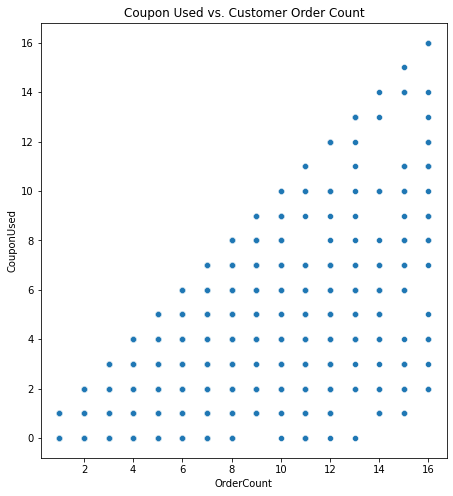

In [32]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.scatterplot(data = df, x = 'OrderCount', y = 'CouponUsed')
plt.title('Coupon Used vs. Customer Order Count')

plt.show()

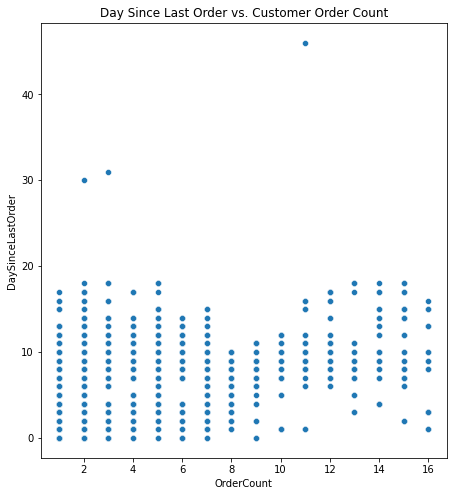

In [33]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.scatterplot(data = df, x = 'OrderCount', y = 'DaySinceLastOrder')
plt.title('Day Since Last Order vs. Customer Order Count')

plt.show()

From above scatterplot, although according to the correlation heatmap the daysincelastorder and ordercount column have a correlation of 0.45, the pattern from above does not show any kind of strong relationship between the ordercount and daysincelastorder

## Based on City Tier

In [34]:
pd.crosstab(df['CityTier'], df['Churn'])

Churn,0,1
CityTier,,
1,3134,532
2,194,48
3,1354,368


In [35]:
df_ctier = pd.crosstab(df['CityTier'], df['Churn'],normalize=0)
df_ctier

Churn,0,1
CityTier,,
1,0.854883,0.145117
2,0.801653,0.198347
3,0.786295,0.213705


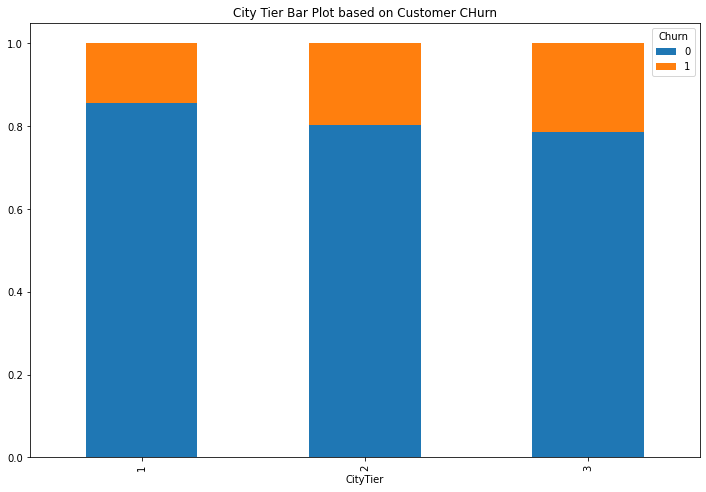

In [36]:
fig = plt.figure(figsize = (12, 8))
ax = plt.subplot(1, 1, 1)
df_ctier.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('City Tier Bar Plot based on Customer CHurn')
plt.show()

It can be seen from above bar plot and cross tabulations, that the higher the city tier, the lower it is the customer churn rate, however the difference in percentage is quite small. Also, it can be seen that most of the customer comes from the city with city tier 1 and the lowest comes from city tier 2 by a large margin of difference.

## Based on Cashback Amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


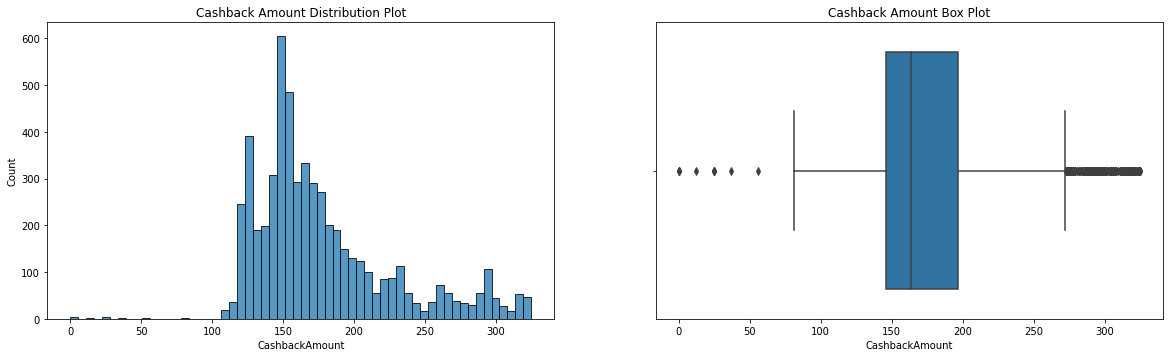

In [37]:
plt.figure(figsize = (20, 12))

plt.subplot(221)
sns.histplot(df['CashbackAmount'])
plt.title('Cashback Amount Distribution Plot')

plt.subplot(222)
sns.boxplot(df['CashbackAmount'])
plt.title('Cashback Amount Box Plot')

plt.show()

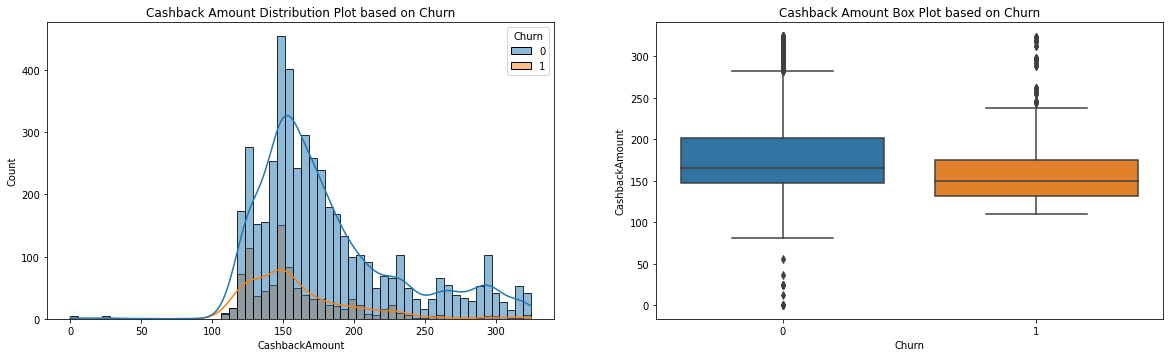

In [38]:
plt.figure(figsize = (20, 12))

plt.subplot(221)
sns.histplot(data = df, x = 'CashbackAmount', hue = 'Churn', kde = True)
plt.title('Cashback Amount Distribution Plot based on Churn')

plt.subplot(222)
sns.boxplot(data = df, y = 'CashbackAmount', x = 'Churn')
plt.title('Cashback Amount Box Plot based on Churn')

plt.show()

From the boxplot above, while the customer not churning had several outliers below the lower fence, the customer that churns had no outliers at all below the lower fence. However in the barplot, we can see that both the customer churning and not churning both have quite normal distribution. However it can be seen that from the barplot and the boxplot even if the cashback amount had a quite high amount, there are customers that churn.

Interestingly, there are people that has not churn with lower than 50 cashback amount, as opposed to the customer that churns where the lower fence of the boxplot is more than 100. However, this can be caused by the fact that these are new customers to the e-commerce website or app

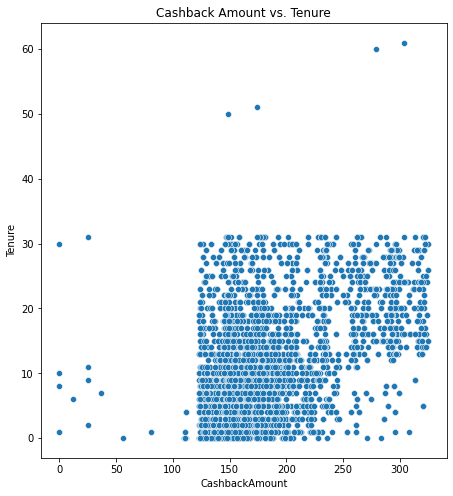

In [39]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.scatterplot(data = df, x = 'CashbackAmount', y = 'Tenure')
plt.title('Cashback Amount vs. Tenure')

plt.show()

## Based on Hour Spends on App and Number of Devices Registered

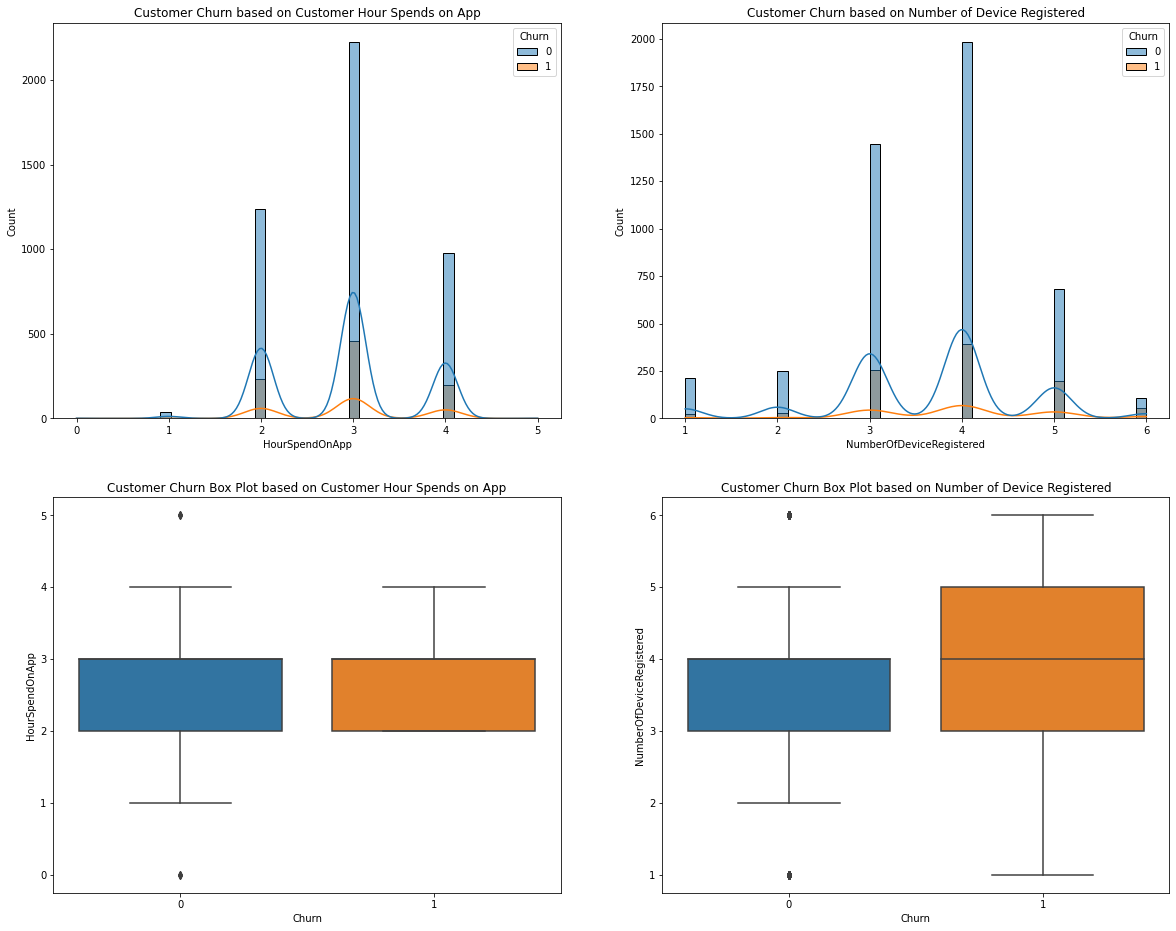

In [40]:
plt.figure(figsize = (20, 16)).tight_layout()

plt.subplot(221)
sns.histplot(data = df, x = 'HourSpendOnApp', hue = 'Churn', kde = True)
plt.title('Customer Churn based on Customer Hour Spends on App')

plt.subplot(222)
sns.histplot(data = df, x = 'NumberOfDeviceRegistered', hue = 'Churn', kde = True)
plt.title('Customer Churn based on Number of Device Registered')

plt.subplot(223)
sns.boxplot(data = df, y = 'HourSpendOnApp', x = 'Churn')
plt.title('Customer Churn Box Plot based on Customer Hour Spends on App')

plt.subplot(224)
sns.boxplot(data = df, y = 'NumberOfDeviceRegistered', x = 'Churn')
plt.title('Customer Churn Box Plot based on Number of Device Registered')

plt.show()

Regarding the amount of time the customers spends on the app, most of the customers spends around 3 hours on the app, with almost all of the customer spending at around 2-4 hours on the app.

Also, for the number of device registered, customers tends to register 4 devices for the app, with most of the customers using around 3-5 devices.

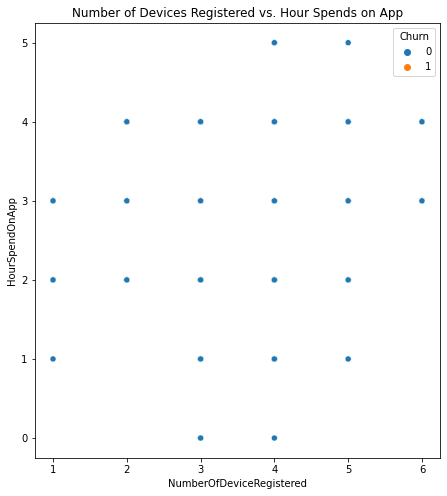

In [41]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
sns.scatterplot(data = df, x = 'NumberOfDeviceRegistered', y = 'HourSpendOnApp', hue = 'Churn')
plt.title('Number of Devices Registered vs. Hour Spends on App')

plt.show()

From the scatterplot, there are no discernable pattern that can be inferred from the plot, thus, it can be said that the correlation between the hour spends on app and number of device registered to be little

## Based on Complains

In [42]:
df_comp = pd.crosstab(df['Complain'], df['Churn'], normalize = 0)
df_comp

Churn,0,1
Complain,,
0,0.890710,0.109290
1,0.683292,0.316708


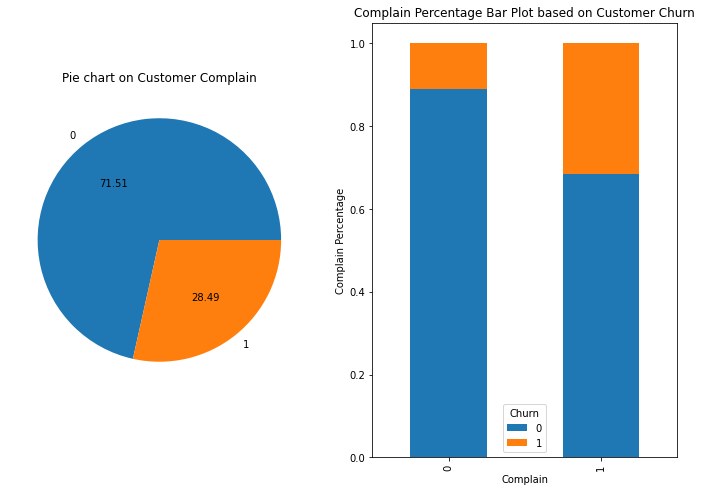

In [43]:
plt.figure(figsize = (12, 8))

plt.subplot(121)
plt.pie(df['Complain'].value_counts(), autopct = '%.2f', labels = [0, 1])
plt.title('Pie chart on Customer Complain', color = 'black')

ax = plt.subplot(1, 2, 2)
df_comp.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('Complain Percentage Bar Plot based on Customer Churn')
plt.ylabel('Complain Percentage')

plt.show()

It can be seen from the pie chart, there are still 28.49% customers that complains, and 71.51% customers that did not complain.

From both above plots, it seems that customers are more likely to churn if they have filed a complain, as can be seen in the barplot, the proportion of people that churns is far higher where people filed a complain within the last month.

## Based on Prefered Order Category, Preferred Payment Mode and Preferred Login Device

In [44]:
df1 = df.copy()

In [45]:
df1['PreferedOrderCat'].replace({'Mobile' : 'Mobile Phone'}, inplace = True)
df1['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'COD' : 'Cash on Delivery'}, inplace = True)
df1['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'}, inplace = True)

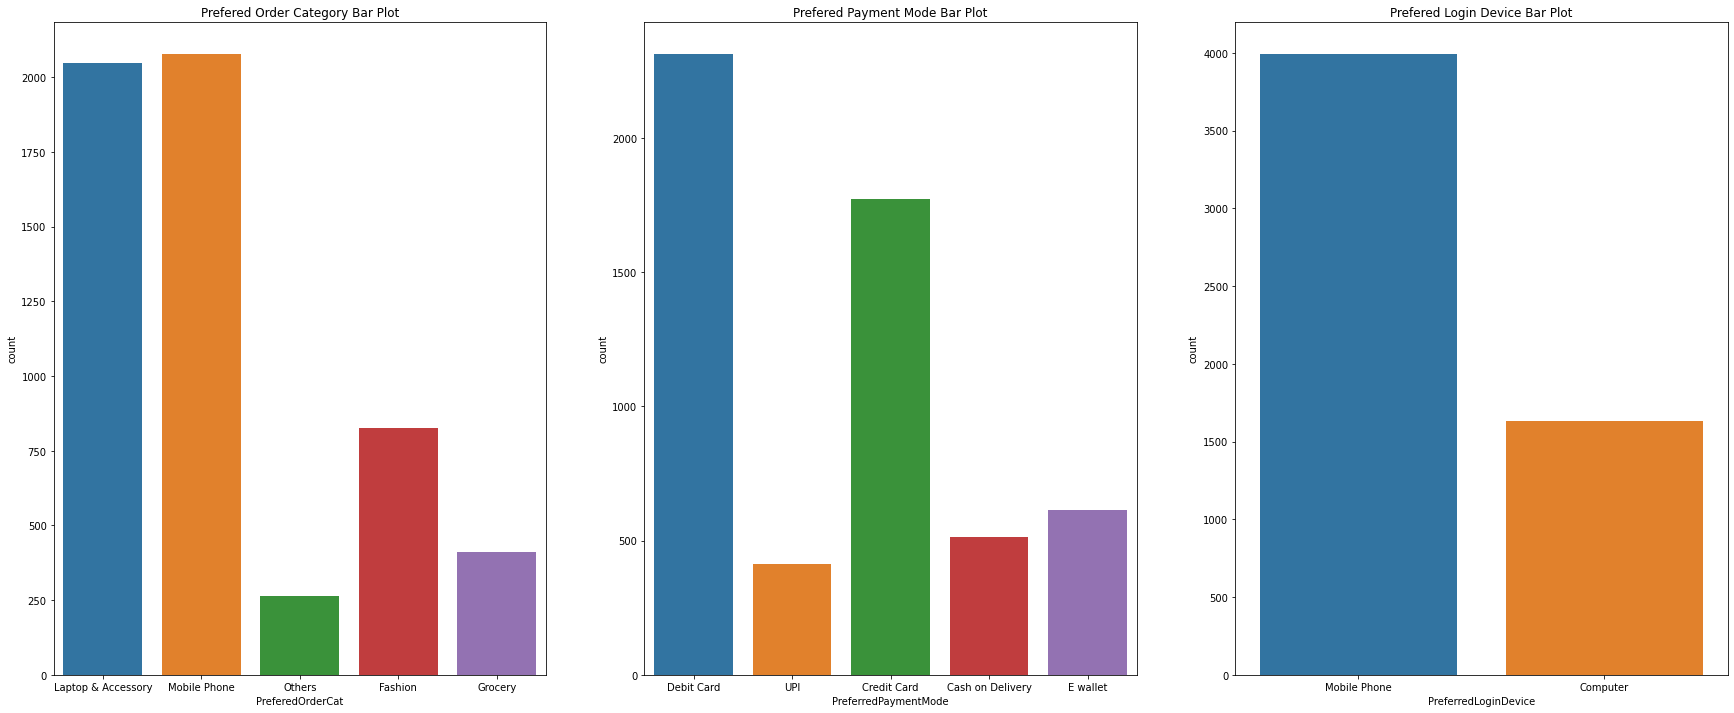

In [46]:
plt.figure(figsize = (30, 12))

plt.subplot(131)
sns.countplot(data = df1, x = 'PreferedOrderCat')
plt.title('Prefered Order Category Bar Plot')

plt.subplot(132)
sns.countplot(data = df1, x = 'PreferredPaymentMode')
plt.title('Prefered Payment Mode Bar Plot')

plt.subplot(133)
sns.countplot(data = df1, x = 'PreferredLoginDevice')
plt.title('Prefered Login Device Bar Plot')

plt.show()

It can be seen from the barplots above, that mostly the customers used the e-commerce app to buy laptop & accessory. The next most popular category is mobile phones. While the least popular category is others.

For the preferred payment mode, debit card is the most popular with credit card being the second, and cash on delivery being the least popular.

For the preferred login device, most customers seems to use mobile phone the most for logging into the e-commerce, with computer being the second most popular with phone being the least popular.

In [47]:
df_cat = pd.crosstab(df1['PreferedOrderCat'], df1['Churn'], normalize = 0)
df_cat

Churn,0,1
PreferedOrderCat,,
Fashion,0.845036,0.154964
Grocery,0.951220,0.048780
Laptop & Accessory,0.897561,0.102439
Mobile Phone,0.725962,0.274038
Others,0.924242,0.075758


In [48]:
df_pay = pd.crosstab(df1['PreferredPaymentMode'], df1['Churn'], normalize = 0)
df_pay

Churn,0,1
PreferredPaymentMode,,
Cash on Delivery,0.750973,0.249027
Credit Card,0.857948,0.142052
Debit Card,0.846154,0.153846
E wallet,0.771987,0.228013
UPI,0.826087,0.173913


In [49]:
df_login = pd.crosstab(df1['PreferredLoginDevice'], df1['Churn'], normalize = 0)
df_login

Churn,0,1
PreferredLoginDevice,,
Computer,0.801714,0.198286
Mobile Phone,0.843844,0.156156


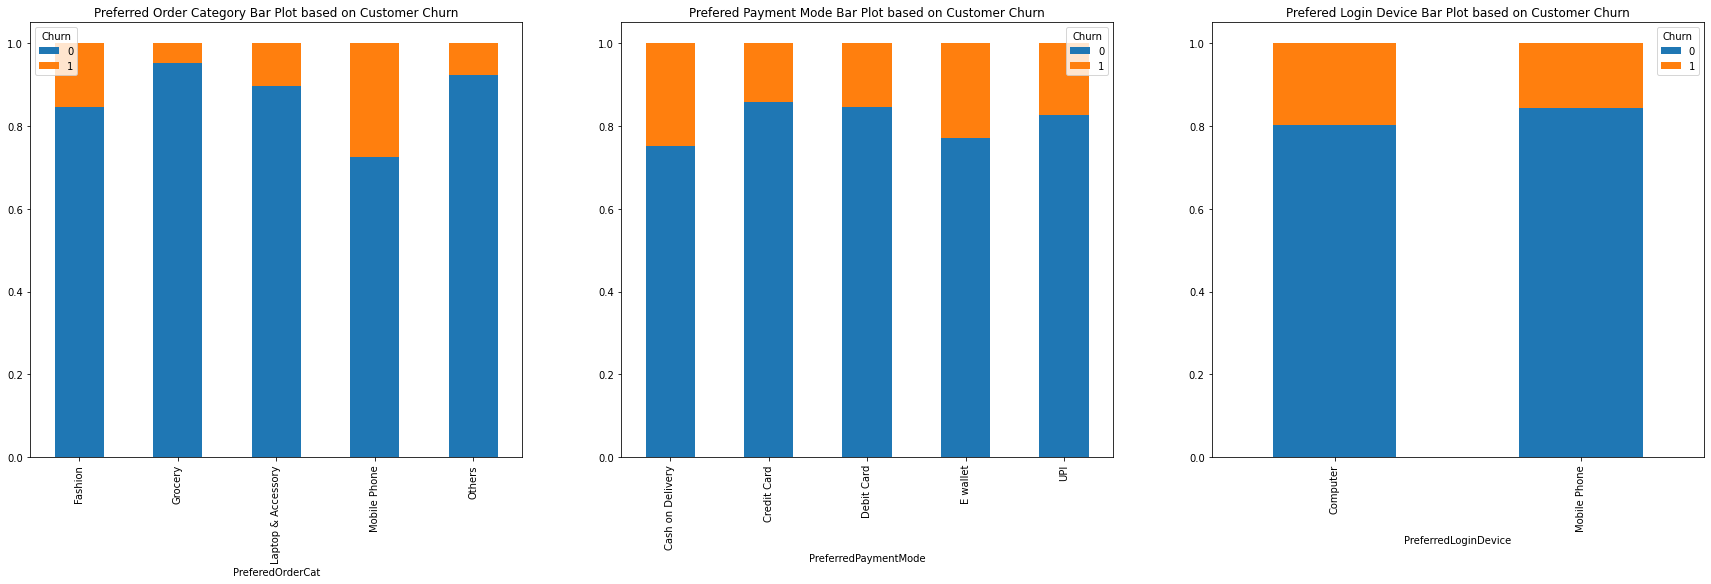

In [50]:
plt.figure(figsize = (30, 8))

ax = plt.subplot(1, 3, 1)
df_cat.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('Preferred Order Category Bar Plot based on Customer Churn')

ax = plt.subplot(1, 3, 2)
df_pay.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('Prefered Payment Mode Bar Plot based on Customer Churn')

ax = plt.subplot(1, 3, 3)
df_login.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('Prefered Login Device Bar Plot based on Customer Churn')

plt.show()

From the barplot above, it also can be seen that the proportion of customers that churns are higher in customers whose preferred order category is mobile phone. Also, among the customers that churns, most of those customers's preferred order category is mobile phone, while the lowest is the grocery category, however that category is also the lowest in count.

Thus, it can be said, that customers whose preferred order category is mobile phone is more likely to churn.

Next, Regarding the payment method the proportion of customer that is likely to churn is customers who pay by COD or Cash on Delivery, while the least likely customers to churn are people who pay through credit card and the next least likely is debit card.

Lastly, regarding the preferred login device, it can be seen the proportion of people that is more likely to churn is the people whose preferred login device is the computer

## Based on Gender

In [51]:
df_gender = pd.crosstab(df['Gender'], df['Churn'], normalize = 0)
df_gender

Churn,0,1
Gender,,
Female,0.845058,0.154942
Male,0.822695,0.177305


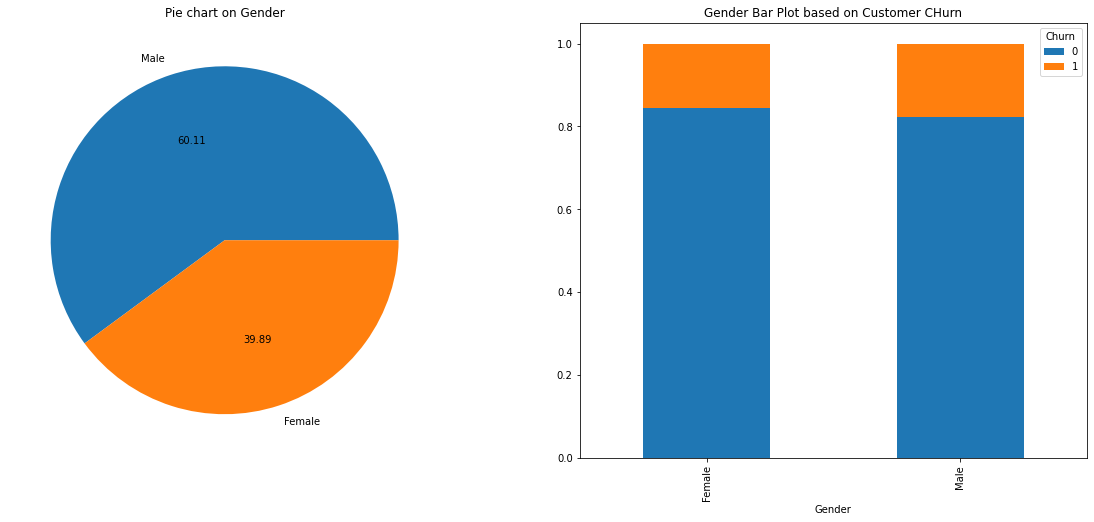

In [52]:
plt.figure(figsize = (20, 8))

plt.subplot(121)
plt.pie(df['Gender'].value_counts(), autopct = '%.2f', labels = ['Male', 'Female'])
plt.title('Pie chart on Gender', color = 'black')

ax = plt.subplot(1, 2, 2)
df_gender.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('Gender Bar Plot based on Customer CHurn')

plt.show()

In [53]:
score, pval, dof, exp = chi2_contingency(df_gender)
if pval<=0.05:
    print('Reject H0', pval)
else:
    print('Fail to reject H0', pval)

Fail to reject H0 1.0


The result of the chi2 test is that the null hypothesis is rejected, thus, it can be inferred that gender have an effect on the customer churn.

From the plots we can see that 60.11% of the customers are male while 39.89% is female, with a difference of 20.22%, which is quite substantial. Also, it can be seen from the barplot that the proportion of the female customer has a slightly lower proportion of people that churns compared to the male customers

## Based on Marital Status

In [54]:
df_marital = pd.crosstab(df['MaritalStatus'], df['Churn'], normalize = 0)
df_marital

Churn,0,1
MaritalStatus,,
Divorced,0.853774,0.146226
Married,0.884796,0.115204
Single,0.732739,0.267261


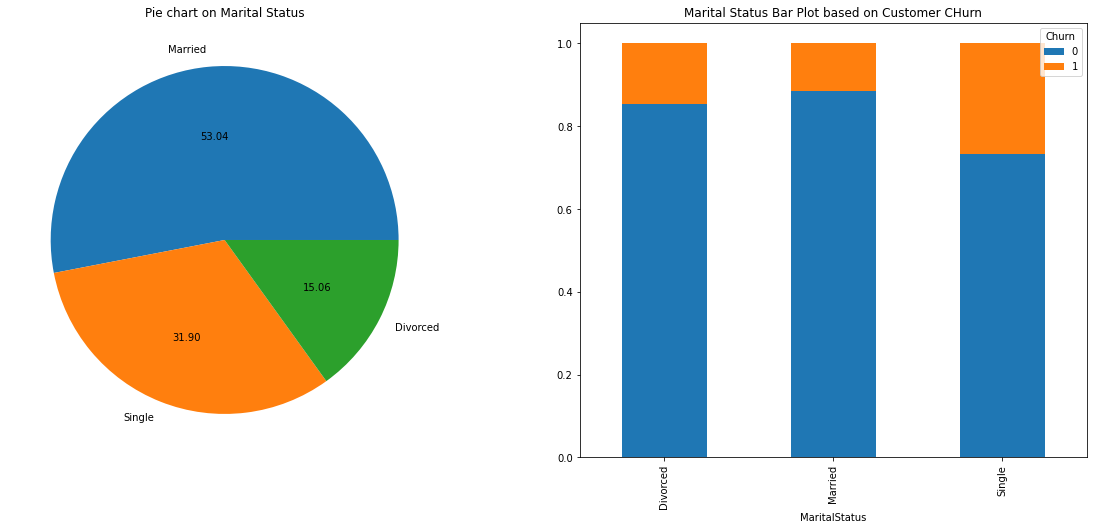

In [55]:
plt.figure(figsize = (20, 8))


plt.subplot(121)
plt.pie(df['MaritalStatus'].value_counts(), autopct = '%.2f', labels = ['Married', 'Single', 'Divorced'])
plt.title('Pie chart on Marital Status', color = 'black')

ax = plt.subplot(122)
df_marital.plot(kind = 'bar', stacked = True, ax = ax)
plt.title('Marital Status Bar Plot based on Customer CHurn')

plt.show()

From the above pie chart, it can be seen that 53.04% of the customers are married, 31.9% of the customers are single and 15.06% of the customers are divorced. 

From the barplot, we can see that the highest proportion of people that churns are single while, the highest proportion of people that did not churn are married customers.

Thus, we can infer that single customers are more likely to churn than the other two marital status with the married customers are the least likely to churn.